# Proyecto Final UD2
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

En este proyecto, los alumnos del módulo de Machine Learning deberán demostrar los conocimientos adquiridos durante la UD2 y aplicar al menos dos algoritmos diferentes de aprendizaje supervisado vistos en clase (KNN, Regresión Lineal, Regresión Logística, Árboles de Decisión, SVM).

Para ello, tomaremos como referencia el dataset credit_train.csv y credit_test.csv que contienen la información sobre una campaña de márketing llevada a cabo mediante llamadas teléfonicas para captar clientes que quieran acceder a un crédito.

**Features o Input variables:**

1 - age: edad numérica
2 - job : tipo de trabajo (puede tomar los valores: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : estado civil (puede tomar los valores: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education : nivel de estudios (puede tomar los valores: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: ya tiene un crédito solicitado por defecto? (puede tomar los valores: 'no','yes','unknown')
6 - housing: tiene hipoteca? (puede tomar los valores: 'no','yes','unknown')
7 - loan: tiene una cuenta personal? (puede tomar los valores: 'no','yes','unknown')
8 - contact: tipo de comunicación de contacto (puede tomar los valores: 'cellular','telephone')
9 - month: último mes de contacto (puede tomar los valores: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: último día de la semana en el que se le ha contactado (puede tomar los valores: 'mon','tue','wed','thu','fri')
11 - duration: duración del último contacto en segundos (numérico). Importante: este atributo afecta en gran medida a la salida ya que si duration es 0, entonces  la salida es 'no')
12 - campaign: número de veces que se le ha contactado durante la campaña a este cliente (numérico, incluye el último contacto)
13 - pdays: número de días que han pasado desde que el cliente fue contactado por última vez(numérico; 999 significa que no ha sido contactado anteriormente)
14 - previous: número de contactos anteriores a esta campaña a este cliente(numérico)
15 - poutcome: resultado de la última campaña de marketing (categorical: 'failure','nonexistent','success')
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: IPC - indicador mensual (numérico)
18 - cons.conf.idx: índice de confianza de los consumidores - indicador mensual (numérico)
19 - euribor3m: euribor tasa 3 meses - indicador diario (numérico)
20 - nr.employed: número de trabajadores - indicador en porciones  (numérico)

**Output variable (desired target):**
21 - y - Suscripción al crédito por parte del cliente? (binary: 'yes','no')

Los requisitos mínimos de este proyecto consisten en:

* Etapas comunes 1, 2 y 3 de importación, análisis numérico y visual, así como preprocesado.
* Para cada algoritmo que apliques deberás de mantener la siguiente estructura de 5 etapas (del 4-8), pero puedes añadir subapartados o etapas adicionales.
* En cada etapa se deben añadir explicaciones justificativas de lo que se quiere hacer, así como de los resultados obtenidos.
* Como resultado final, se deben contrastar los resultados obtenidos y comparar los algoritmos utilizados indicando claramente cual y porqué obtiene mejor resultados.

* Cualificaciones:
- Uso de 2 algoritmos: cualificación máxima de 7 puntos
- Uso de 3 algoritmos: cualificación máxima de 9 puntos.
- Almacenaje de los datasets en AWS S3 y uso de 3 algoritmos: cualificación máxima de 10 puntos.

Uso de GIT para 



## 1. Importación de paquetes y dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
credit_train=pd.read_csv('data/credit-train.csv')

In [3]:
credit_train.shape

(41188, 21)

In [5]:
credit_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [6]:
credit_train.index

RangeIndex(start=0, stop=41188, step=1)

In [7]:
credit_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [8]:
credit_train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [9]:
credit_train_mean_pdays = credit_train['pdays'].mean()
credit_train.mean()

C:\Users\CARLOS~1\AppData\Local\Temp/ipykernel_3256/1471661273.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  credit_train.mean()


age                 40.024060
duration           258.285010
campaign             2.567593
pdays              962.475454
previous             0.172963
emp_var_rate         0.081886
cons_price_idx      93.575664
cons_conf_idx      -40.502600
euribor3m            3.621291
nr_employed       5167.035911
y                    0.112654
dtype: float64

In [10]:
credit_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1


## 2.EDA y Visual EDA

In [11]:
credit_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [12]:
round(credit_train.describe())

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0
mean,40.0,258.0,3.0,962.0,0.0,0.0,94.0,-41.0,4.0,5167.0,0.0
std,10.0,259.0,3.0,187.0,0.0,2.0,1.0,5.0,2.0,72.0,0.0
min,17.0,0.0,1.0,0.0,0.0,-3.0,92.0,-51.0,1.0,4964.0,0.0
25%,32.0,102.0,1.0,999.0,0.0,-2.0,93.0,-43.0,1.0,5099.0,0.0
50%,38.0,180.0,2.0,999.0,0.0,1.0,94.0,-42.0,5.0,5191.0,0.0
75%,47.0,319.0,3.0,999.0,0.0,1.0,94.0,-36.0,5.0,5228.0,0.0
max,98.0,4918.0,56.0,999.0,7.0,1.0,95.0,-27.0,5.0,5228.0,1.0


## Análise Visual
Despois de revisar os datos facemos unha mostra gráfica para tentar entender a correlación dos datos:

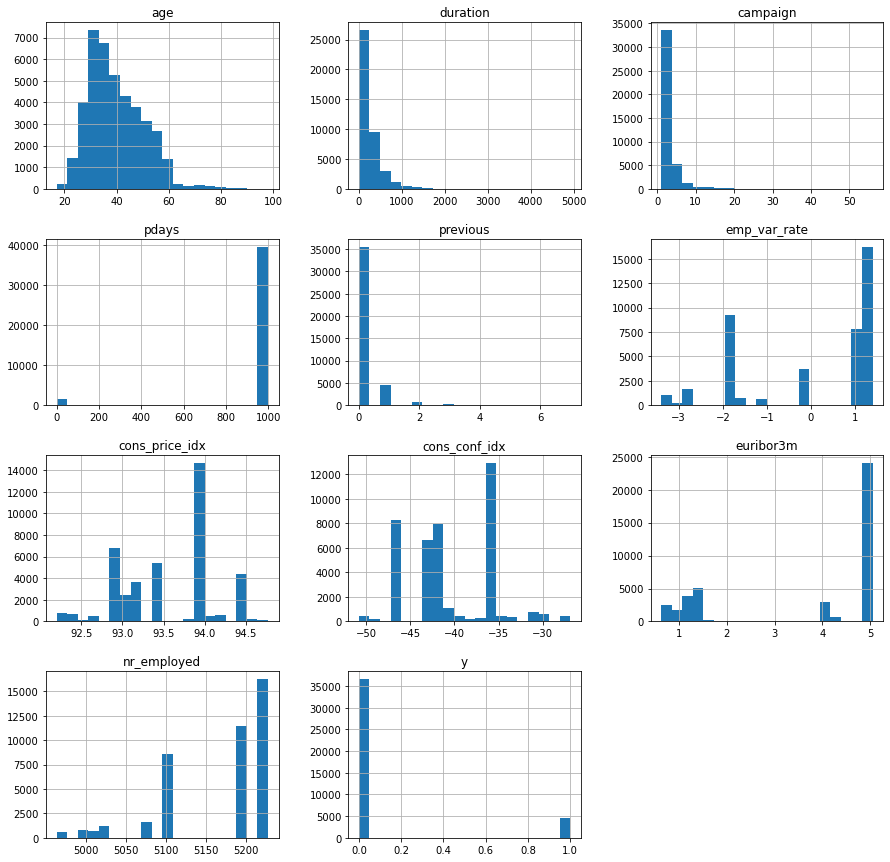

In [13]:
import matplotlib.pyplot as plt
credit_train.hist(bins=20,figsize=(15,15))
plt.show()

Pdays ten un problema nos datos, temos que sustituír o valor 999 por 0, para evitar unha distorsión da distribución dos valores.

array([[<AxesSubplot:title={'center':'pdays'}>]], dtype=object)

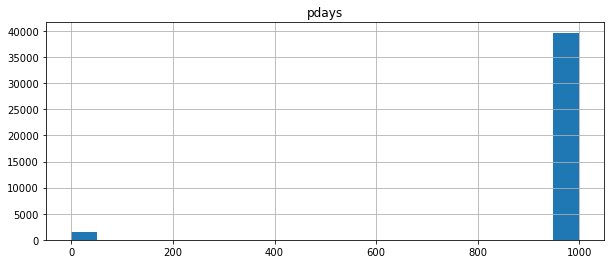

In [14]:
credit_train.hist(column=['pdays'],bins=20,figsize=(10,4))

## 3. Preprocessing data


In [15]:
credit_train['pdays'].unique()

array([999,   6,   3,   2,   4,  16,   0,   5,  11,  14,  13,   9,  15,
        17,  12,  26,   7,  19,  10,   1,  18,   8,  20,  21,  22,  25,
        27], dtype=int64)

Imos sustituir o valor 999 polo 0, que é o valor real

In [16]:
credit_train.loc[credit_train['pdays']==999, 'pdays']=0
credit_train['pdays'].unique()

array([ 0,  6,  3,  2,  4, 16,  5, 11, 14, 13,  9, 15, 17, 12, 26,  7, 19,
       10,  1, 18,  8, 20, 21, 22, 25, 27], dtype=int64)

In [17]:
credit_train['pdays'][credit_train['pdays']>0].count()

1500

In [18]:
credit_train['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [19]:
credit_train['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [20]:
credit_train['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [21]:
credit_train['default'].unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [22]:
credit_train['housing'].unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [23]:
credit_train['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [24]:
credit_train['contact'].unique()

array(['cellular', 'telephone'], dtype=object)

In [25]:
credit_train['poutcome'].unique()

array(['nonexistent', 'success', 'failure'], dtype=object)

In [26]:
credit_train['month'].unique()

array(['aug', 'nov', 'jun', 'apr', 'jul', 'may', 'oct', 'mar', 'sep',
       'dec'], dtype=object)

In [27]:
credit_train['day_of_week'].unique()

array(['thu', 'fri', 'tue', 'mon', 'wed'], dtype=object)

In [28]:
#Eliminamos o mes e o día da semana

In [29]:
credit_train = credit_train.drop(columns=['month', 'day_of_week'])

In [30]:
credit_train 

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,210,1,0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,138,1,0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,185,2,0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,222,1,0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,196,2,0,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,62,3,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,200,2,0,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


## Imos substituír todas categorías que aparecen como string por números

In [31]:
from sklearn.preprocessing import LabelEncoder
class_label_encoder = LabelEncoder()
credit_train['education']=class_label_encoder.fit_transform(credit_train['education'].values)
class_label_encoder.classes_

array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown'],
      dtype=object)

In [32]:
credit_train['job']=class_label_encoder.fit_transform(credit_train['job'].values)
class_label_encoder.classes_

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [33]:
credit_train['marital']=class_label_encoder.fit_transform(credit_train['marital'].values)
class_label_encoder.classes_

array(['divorced', 'married', 'single', 'unknown'], dtype=object)

In [34]:
credit_train['default']=class_label_encoder.fit_transform(credit_train['default'].values)
class_label_encoder.classes_

array(['no', 'unknown', 'yes'], dtype=object)

In [35]:
credit_train['housing']=class_label_encoder.fit_transform(credit_train['housing'].values)
class_label_encoder.classes_

array(['no', 'unknown', 'yes'], dtype=object)

In [36]:
credit_train['loan']=class_label_encoder.fit_transform(credit_train['loan'].values)
class_label_encoder.classes_

array(['no', 'unknown', 'yes'], dtype=object)

In [37]:
credit_train['contact']=class_label_encoder.fit_transform(credit_train['contact'].values)
class_label_encoder.classes_

array(['cellular', 'telephone'], dtype=object)

In [38]:
credit_train['poutcome']=class_label_encoder.fit_transform(credit_train['poutcome'].values)
class_label_encoder.classes_

array(['failure', 'nonexistent', 'success'], dtype=object)

In [39]:
credit_train

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,1,2,0,0,210,1,0,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,7,0,0,0,0,138,1,0,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,0,2,0,0,339,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,3,0,0,0,0,185,2,0,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,0,2,0,0,137,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,5,1,3,1,0,2,1,222,1,0,0,1,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,3,1,0,1,0,0,1,196,2,0,0,1,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,0,2,6,1,2,2,1,62,3,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,9,1,5,0,0,2,1,200,2,0,0,1,-3.4,92.431,-26.9,0.742,5017.5,0


In [40]:
credit_train.corr()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368,0.007021,-0.000866,0.004594,0.018132,0.024365,0.019750,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.006490,-0.006923,0.023579,0.020965,0.011504,-0.008271,-0.016017,0.052760,-0.007880,-0.019574,0.025122
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,0.010290,-0.007240,0.036175,0.038689,0.001912,-0.084210,-0.057477,-0.033783,-0.091939,-0.086199,0.046203
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.015102,0.000371,0.036831,0.038831,0.017009,-0.043778,-0.081607,0.078799,-0.036380,-0.041492,0.057799
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.011794,0.032825,-0.067772,-0.102416,0.023417,0.203263,0.168073,0.026522,0.195336,0.189845,-0.099352
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.007658,-0.011010,0.004284,0.021314,-0.011783,-0.060196,-0.080504,-0.033845,-0.059277,-0.045862,0.011552
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.000916,0.005166,-0.003122,-0.001327,-0.001511,0.001849,-0.002430,-0.012025,0.000125,0.003903,-0.004909
contact,0.007021,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,-0.026657,0.077368,-0.098173,-0.212848,0.118744,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
duration,-0.000866,-0.006490,0.010290,-0.015102,-0.011794,-0.007658,-0.000916,-0.026657,1.000000,-0.071699,0.047853,0.020640,0.033360,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.006923,-0.007240,0.000371,0.032825,-0.011010,0.005166,0.077368,-0.071699,1.000000,-0.041984,-0.079141,0.032586,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357


<AxesSubplot:>

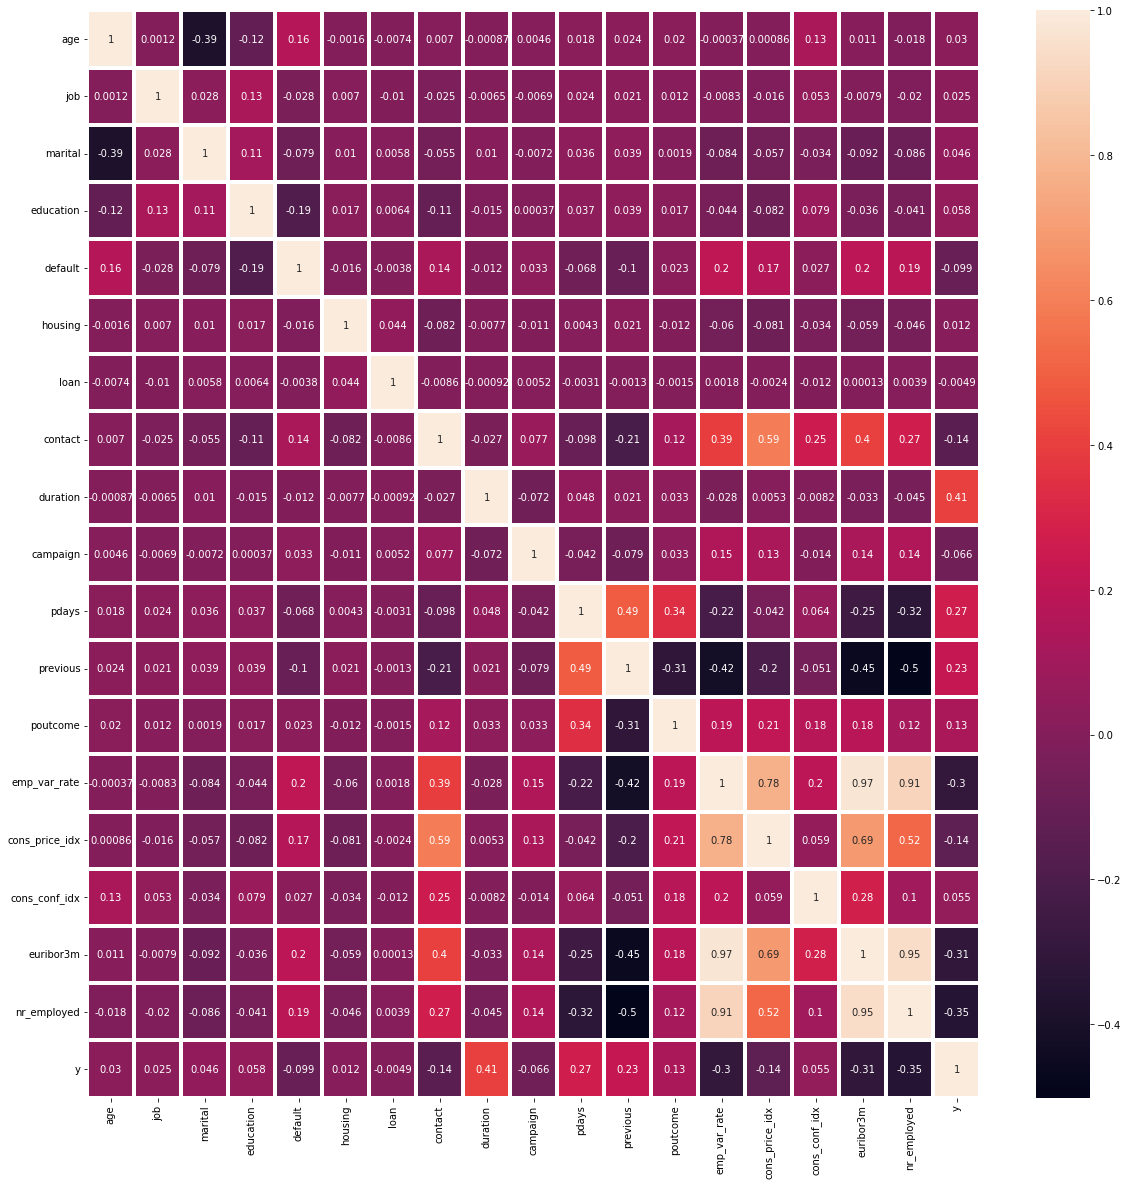

In [41]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(credit_train.corr(),annot=True,linewidths=4)

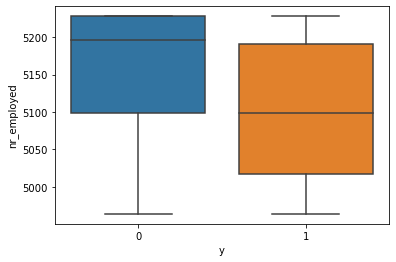

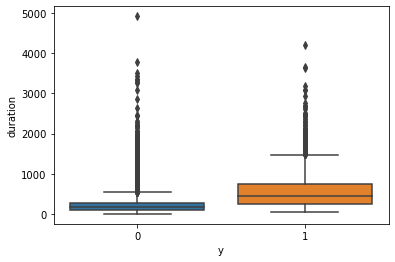

In [42]:
for var in ['nr_employed', 'duration']:
    sns.boxplot(x='y',y=var,data=credit_train)
    plt.show()

array([[<AxesSubplot:title={'center':'nr_employed'}>,
        <AxesSubplot:title={'center':'duration'}>]], dtype=object)

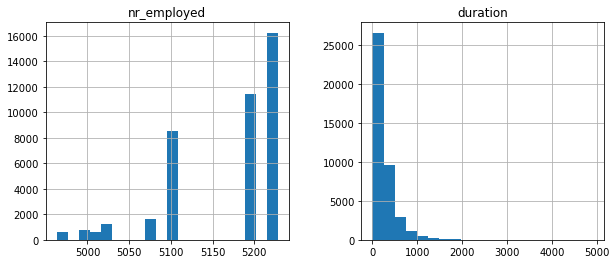

In [43]:
credit_train.hist(column=['nr_employed', 'duration'],bins=20,figsize=(10,4))

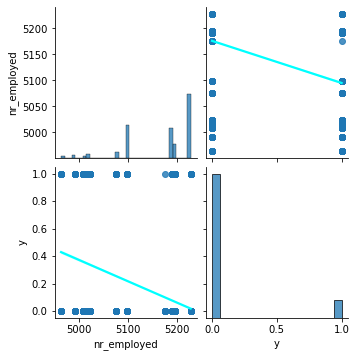

In [44]:
sns.pairplot(credit_train[['nr_employed', 'y']], kind='reg',plot_kws={'line_kws':{'color':'cyan'}})

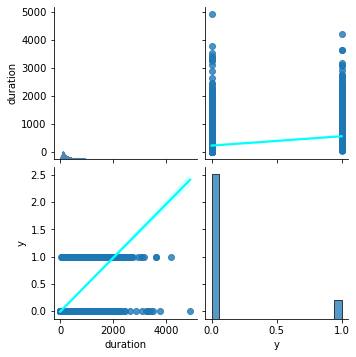

In [45]:
sns.pairplot(credit_train[['duration','y']], kind='reg',plot_kws={'line_kws':{'color':'cyan'}})

<AxesSubplot:ylabel='Frequency'>

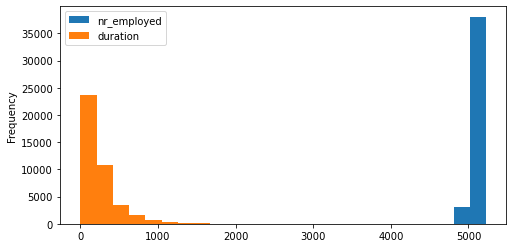

In [46]:
credit_train[['nr_employed', 'duration']].plot.hist(bins=25,figsize=(8,4))

<AxesSubplot:ylabel='Density'>

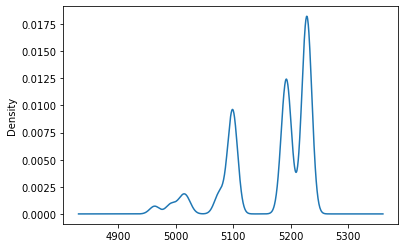

In [47]:
credit_train['nr_employed'].plot.density()

<AxesSubplot:ylabel='Density'>

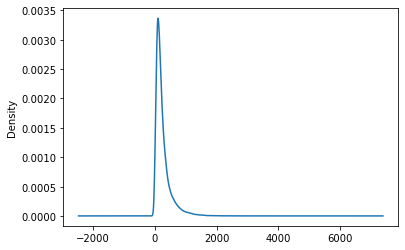

In [48]:
credit_train['duration'].plot.density()

## 4. Creación del modelo y división del dataset


In [3]:
X=credit_train[['duration']]
y=credit_train['y']

X.shape
y.shape

(41188,)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
print("Datos de treinamento:",X_train.shape)
print("Datos de test:",X_test.shape)
print("Variable de treinamento:",y_train.shape)
print("variable de test:",y_test.shape)

Datos de treinamento: (28831, 1)
Datos de test: (12357, 1)
Variable de treinamento: (28831,)
variable de test: (12357,)


In [6]:
y_train

31056    0
35655    0
32508    0
8031     0
13067    0
        ..
40465    0
13355    0
18983    1
25944    0
9425     0
Name: y, Length: 28831, dtype: int64

## 5. Entrenamiento

In [7]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [8]:
lm.fit(X_train,y_train)

LinearRegression()

## 6. Análisis de resultados

In [10]:
print("O punto de cruzamento do modelo :", lm.intercept_)

O punto de cruzamento do modelo : -0.017411968451127177


In [11]:
print("O coeficiente do modelo:", lm.coef_)

Os coeficientes do modelo: [0.00049902]


In [12]:
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coeficiente"])
cdf

,Coeficientes
duration,0.000499


## 7. Realización de predicciones

In [13]:
predictions = lm.predict(X_test)
print ("Clase de obxecto de predicción:", type(predictions))
print ("Tamaño da obxecto de predicción:", predictions.shape)

Clase de obxecto de predicción: <class 'numpy.ndarray'>
Tamaño da obxecto de predicción: (12357,)


## 8. Visualización

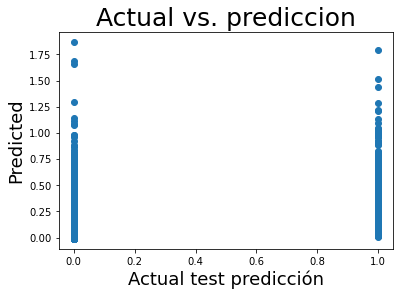

In [16]:

plt.title("Actual vs. prediccion",fontsize=25)
plt.xlabel("Actual test predicción",fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.scatter(x=y_test,y=predictions)


In [15]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

Mean absolute error (MAE): 0.171772401596843
Mean square error (MSE): 0.08735260011201405
Root mean square error (RMSE): 0.29555473285334827
R-squared value of predictions: 0.156
